#181180046 Ahmet Furkan KARATAŞ
#CENG313 Introduction To Data Science Assignment II

In [1]:
# 181180046 Ahmet Furkan KARATAŞ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random
from scipy.spatial.distance import cdist
# importing necessary libraries.

iris_data = load_iris() # Loading iris data from library to variable.
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris['species'] = pd.Series(iris_data.target)
df_for_k_means = df_iris.drop(columns=["petal length (cm)", "petal width (cm)", "species"], inplace=False)
# We will work with unsupervised machine learning algortihm for this reason we are removing the
# labels and unwanted columns.
df_for_k_means = df_for_k_means[["sepal width (cm)", "sepal length (cm)"]]
df_for_k_means = df_for_k_means.values # We just get values because we will work with values and 
# our algorithm only accept this format.
# Defining variable names and organising dataset.

def kmeans(dataset_df, k, number_of_iterations, is_show): # K Means algortihm
# It takes 4 parameters.
# 1. Dataset
# 2. Number of k
# 3. Number of iterations
# 4. Boolean variable to show iterations or just returning last iteration's values to determine.
  plt.close() # We closed the figures to not make any weird looking.
  index = np.random.choice(len(dataset_df), k, replace=False)
  # We generated random indexes to use them to assign first cluster centers.
  centroids = dataset_df[index, :]
  # We initialized first centroids with random dataset indexes.
  distances = cdist(dataset_df, centroids ,'euclidean')
  # We used scipy library to calculate euclidean distance
  points = np.array([np.argmin(i) for i in distances])
  # Compared to min distances with euclidean distance.   
  for a in range(number_of_iterations): # We used for loop while reaching the expected iterations.
    centroids = []
    # Assigned centroids to a empty list.
    for index in range(k):
      centroids.append(dataset_df[points==index].mean(axis=0))
    centroids = np.vstack(centroids)
    # We used numpay v stack data structures.
    distances = cdist(dataset_df, centroids ,'euclidean')
    label = np.array([np.argmin(i) for i in distances])
    # Again we compared to get min distance.
    unique_labels = np.unique(label) # We stored the unique numbers to use this number later for for loop.
    if is_show: # Checked for visualizing or not.
      fig, ax = plt.subplots(figsize=(8, 5))
      for i in unique_labels:
        # We draw a scatterplot and looped for the expected cluster numbers.
        plt.scatter(dataset_df[label == i , 0] , dataset_df[label == i , 1] , label = i)
        plt.scatter(centroids[i, 0], centroids[i, 1],  s=200,marker='s', c='k', alpha=0.7)
        # We draw bigger and black cluster centers to see them clearly.
      plt.title("Sepal Length vs Sepal Width According to Their Species K Means Clustering iteration: "+ str(a+1))
      plt.xlabel("Sepal Width (cm)")
      plt.ylabel("Sepal Length (cm)")  
      plt.legend()
      plt.show()
      # We set some variables just like label, title and legend to look pretty.
  return label, centroids # We returned last iteration's cluster centers and clusters.

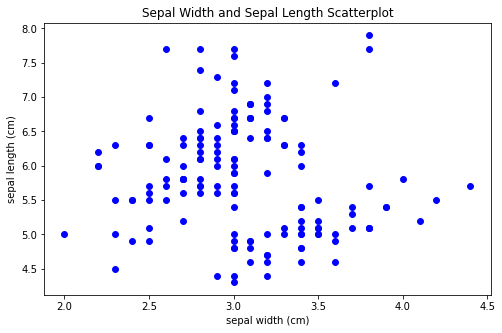

In [2]:
# Question 1
plt.close() # We closed the figures to not make any weird looking.
df_iris_Q1 = df_iris.copy()
# we copy to avoid permanent damage to the dataset and working with the copy.
df_iris_Q1.plot(kind = 'scatter',
             x = 'sepal width (cm)',
             y = 'sepal length (cm)',
             figsize = (8, 5),
             s = 35,
             color = 'b')
# We set color figsize and marker's size to comply with the design rest of our code.
plt.title("Sepal Width and Sepal Length Scatterplot")
plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")
plt.show()
# We set some variables just like label, title and legend to look pretty.

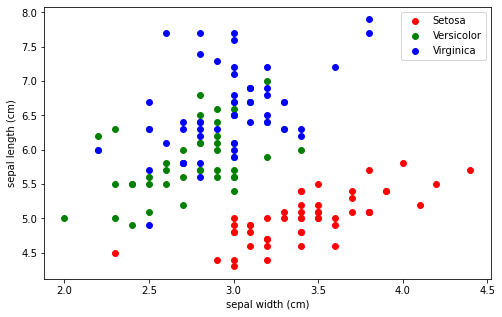

In [3]:
# Question 2
plt.close() # We closed the figures to not make any weird looking.
df_iris_Q2 = df_iris.copy()
# we copy to avoid permanent damage to the dataset and working with the copy.
fig, axes_1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax = df_iris_Q2[df_iris_Q2.species==0].plot.scatter(x='sepal width (cm)', y='sepal length (cm)', 
                                                    color='red', label='Setosa',s = 35, ax = axes_1);
df_iris_Q2[df_iris_Q2.species==1].plot.scatter(x='sepal width (cm)', y='sepal length (cm)', 
                                                color='green', label='Versicolor',s = 35, ax=axes_1);
df_iris_Q2[df_iris_Q2.species==2].plot.scatter(x='sepal width (cm)', y='sepal length (cm)', 
                                                color='blue', label='Virginica',s = 35, ax=axes_1);
# We set color figsize and marker's size to comply with the design rest of our code.

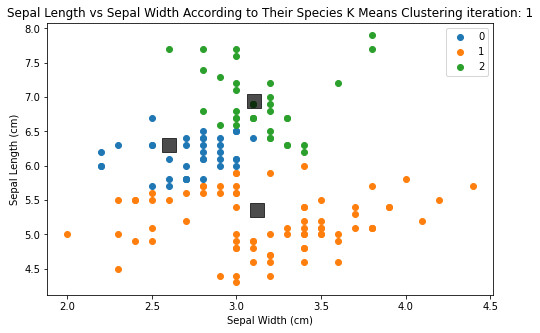

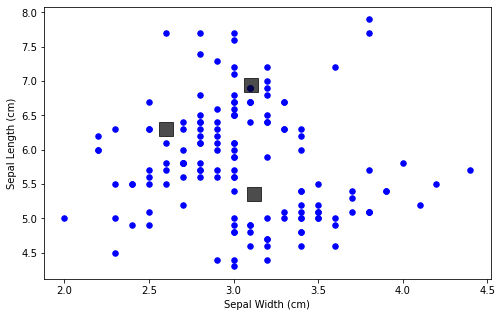

In [4]:
# Question 3
plt.close() # We closed the figures to not make any weird looking.
df_iris_Q3 = df_iris.copy()
# we copy to avoid permanent damage to the dataset and working with the copy.
label, centers = kmeans(df_for_k_means,3,1, True)
# We executed our K Means function with the iteration number 1 and k(cluster) number 3
# We used True to see the output. (Because of iteration number is 1 it will show only the random cluster centers.)
# Every time we started tihs cell we can see different outputs regardind the random.
fig, ax = plt.subplots(1, 1)
df_iris_Q3.plot(kind = 'scatter',
             x = 'sepal width (cm)',
             y = 'sepal length (cm)',
             ax = ax,
             s = 30,
             figsize = (8, 5),
             color = 'b')
# We set color figsize and marker's size to comply with the design rest of our code.
for i in range(3): # We used for loop with range(3) to loop exactly 3 times and as requested for k=3 
# to show clusters and centers.
  plt.scatter( centers[i,0], centers[i,1],  s=200,marker='s', c='k', alpha=0.7);
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Sepal Length (cm)")
# We set some variables just like label and legend to look pretty.
plt.show()
# One output generated by K-Means function to show clusters for the random choosen cluster centers.
# Other output is the similar output with the question 1 just included random cluster centers for k = 3.
# I just wanted to be sure and for this reason i showed both of them.

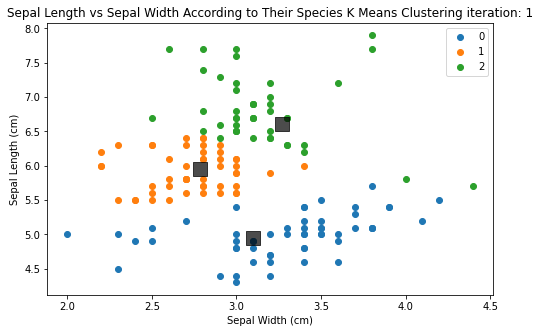

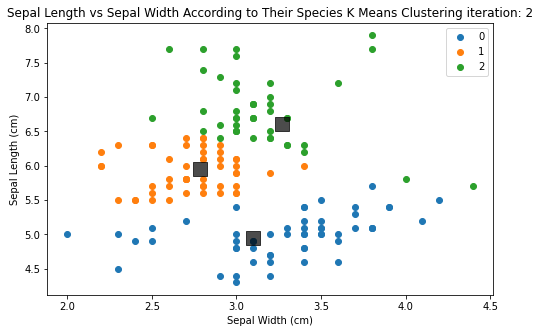

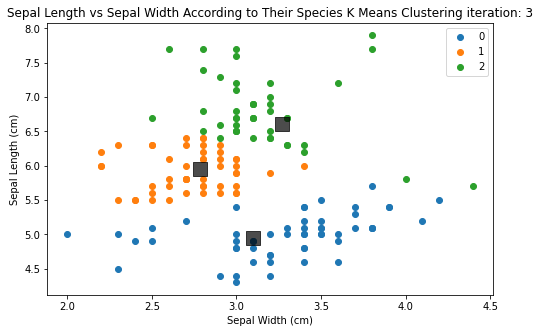

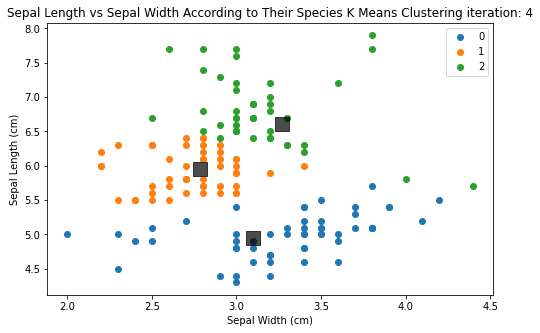

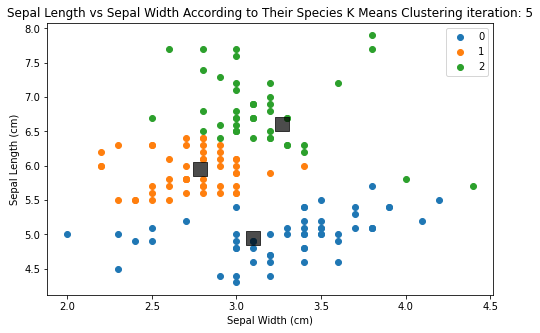

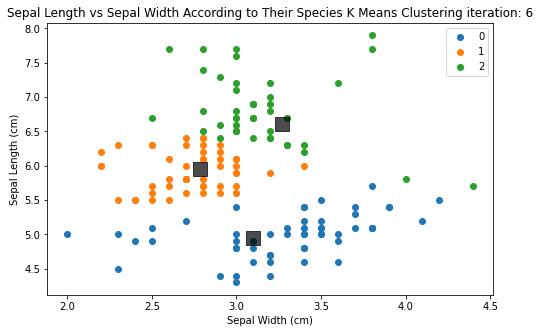

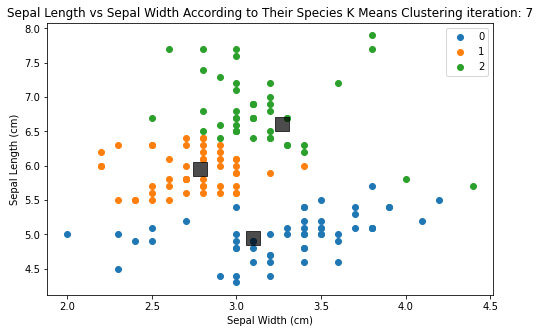

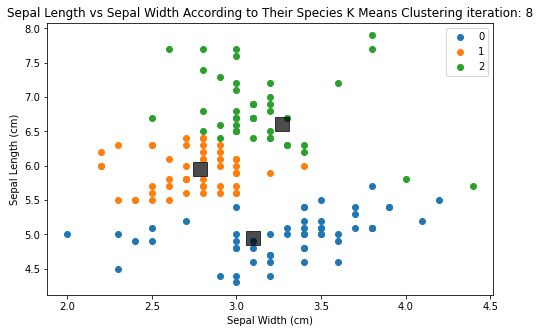

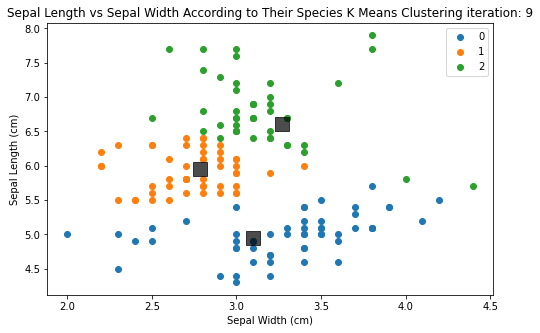

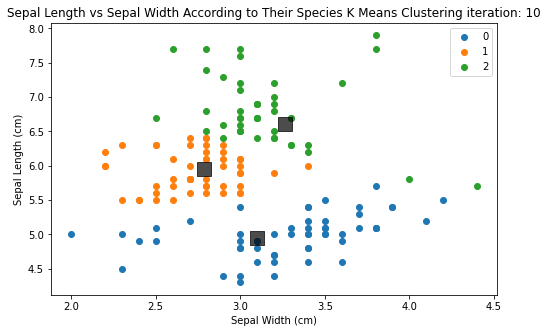

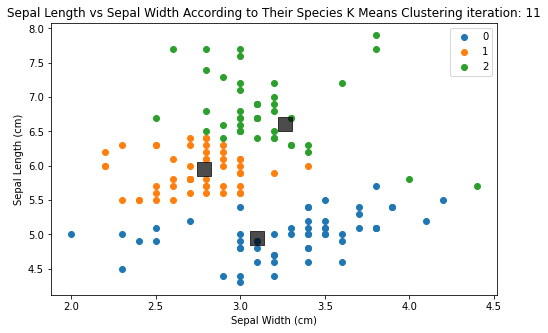

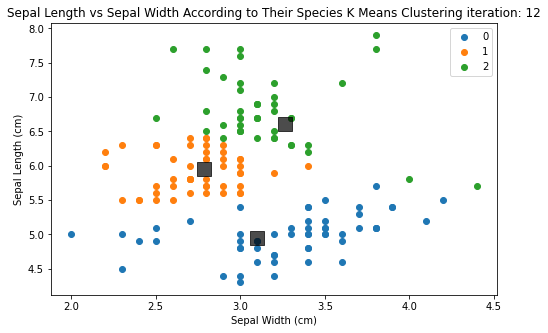

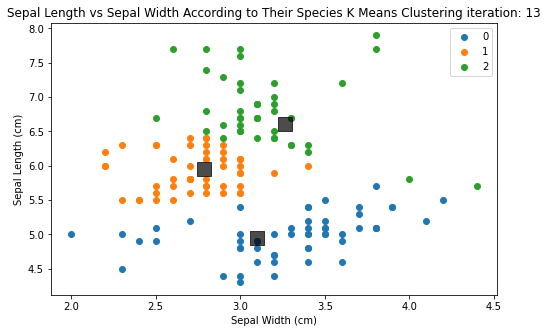

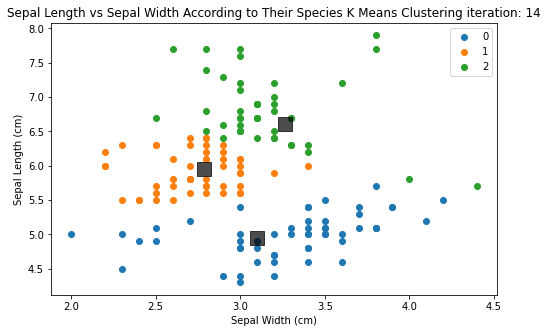

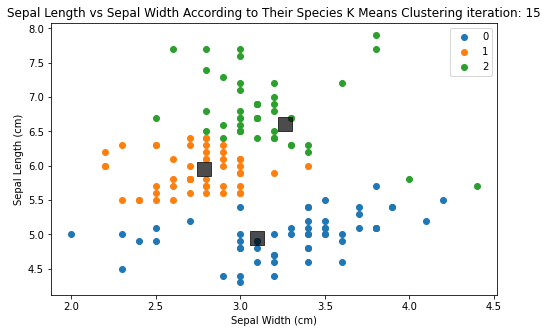

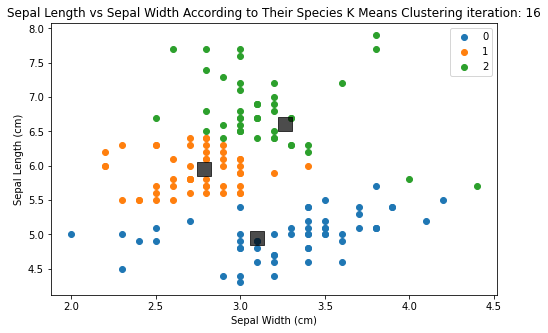

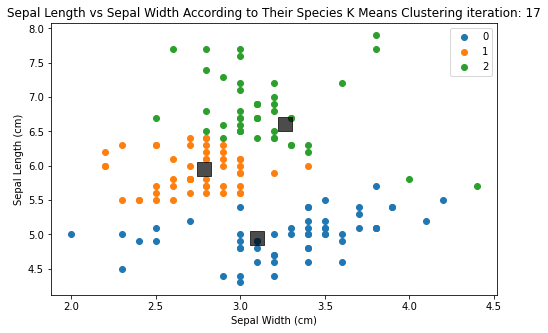

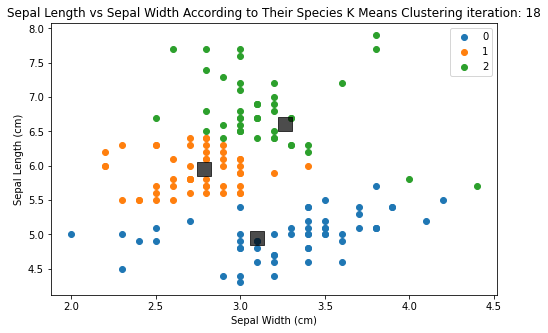

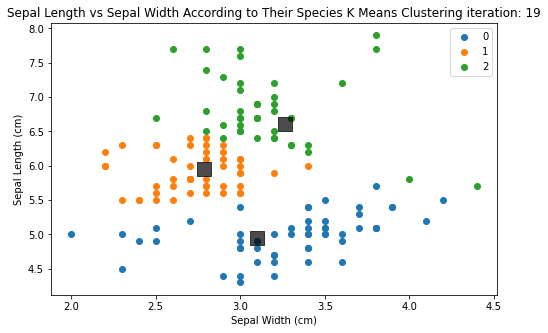

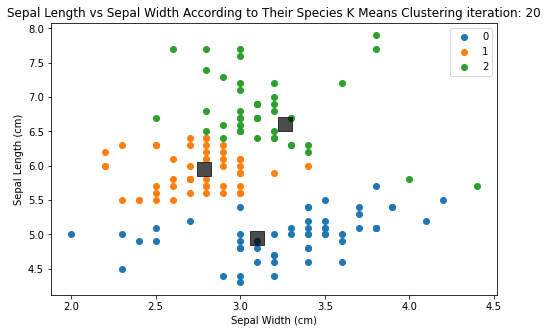

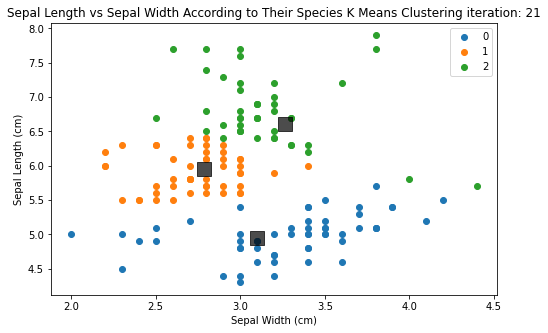

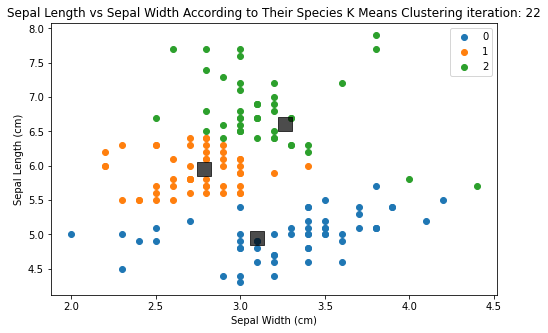

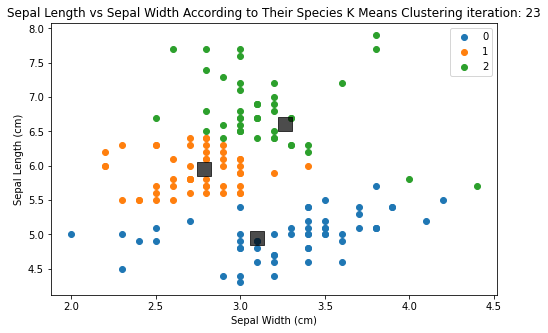

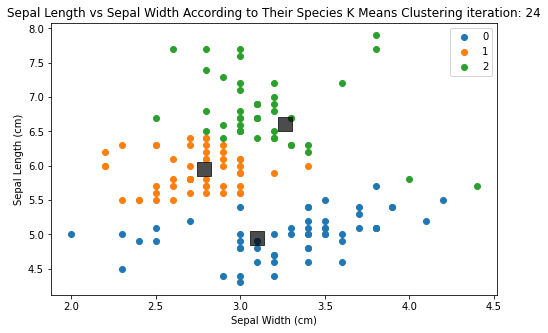

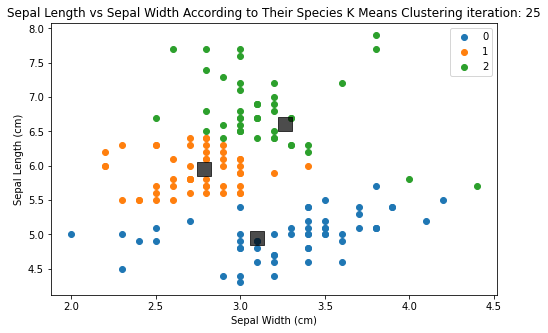

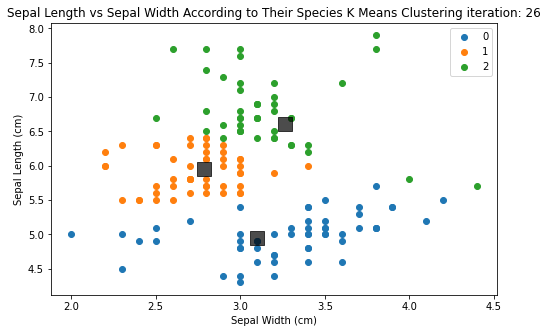

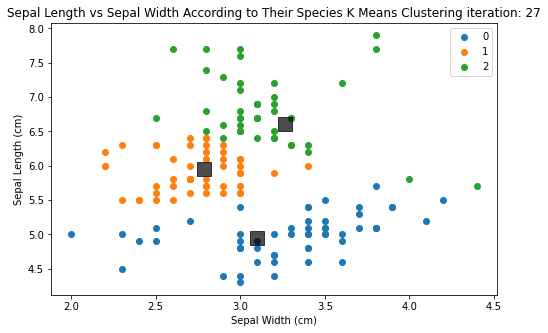

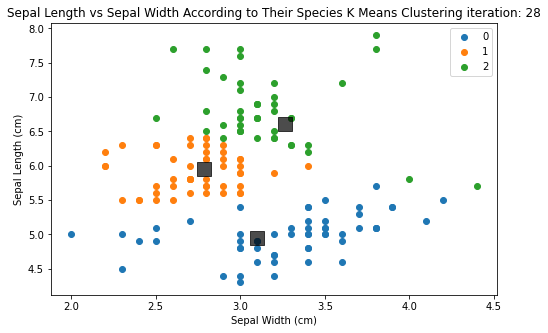

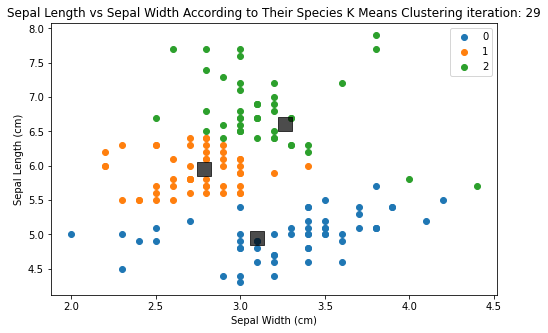

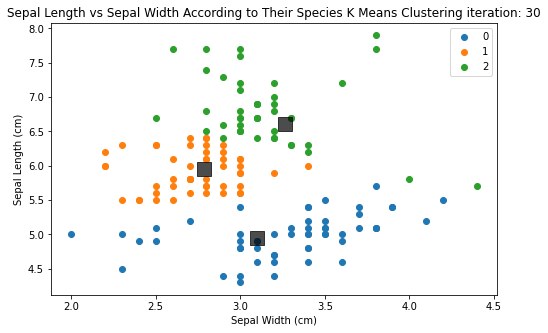

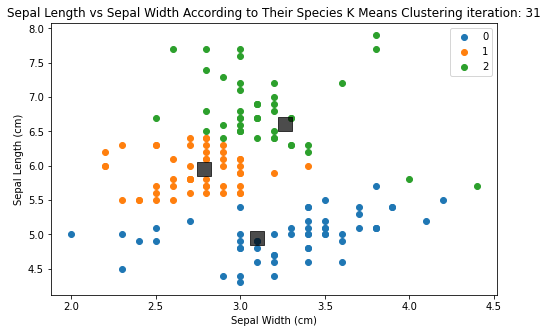

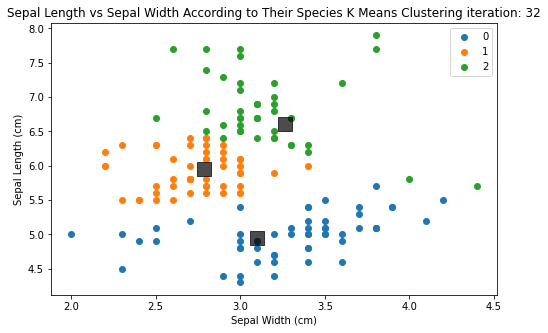

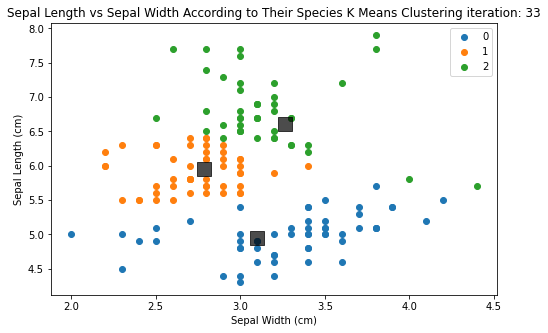

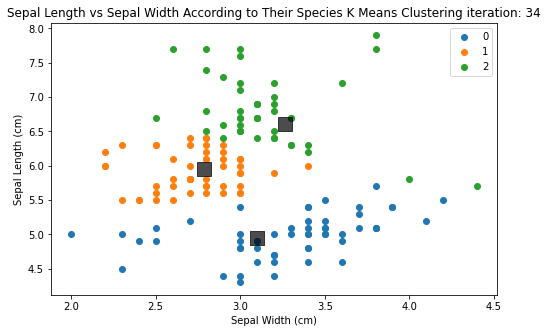

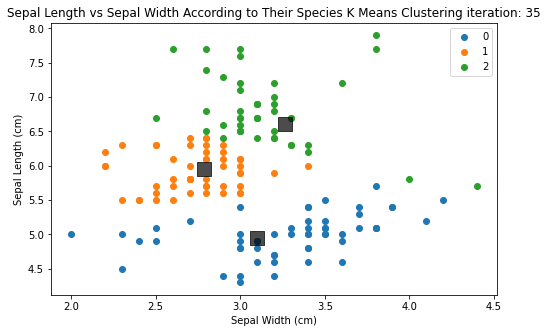

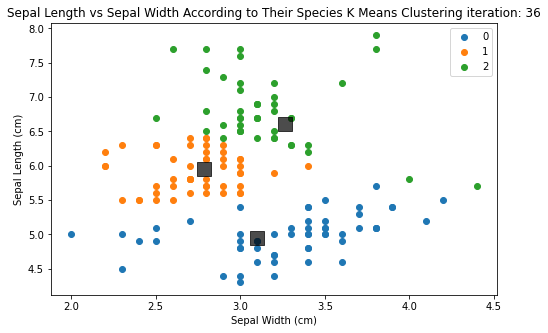

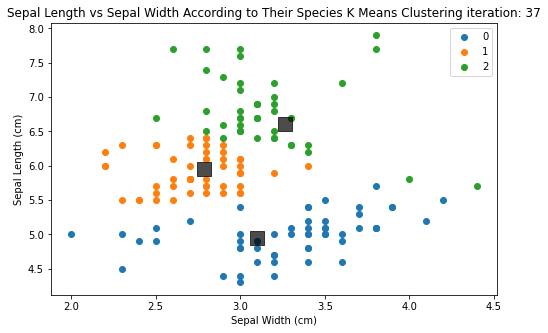

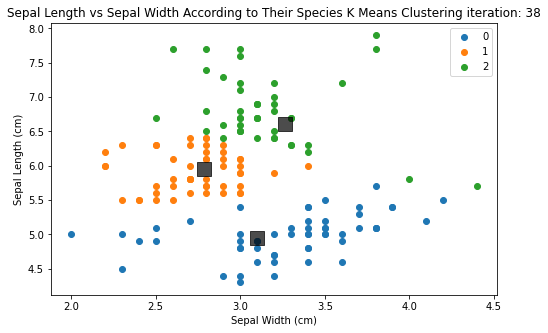

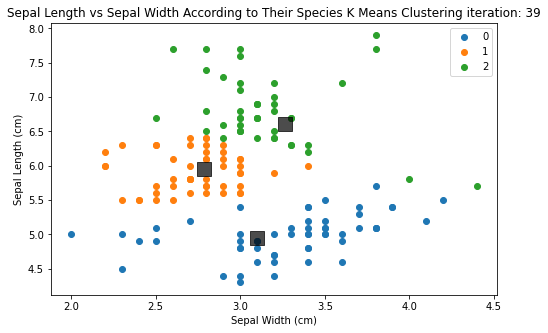

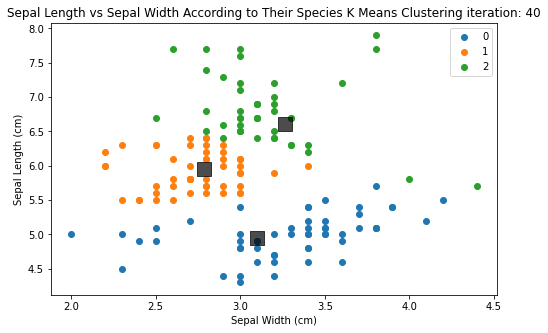

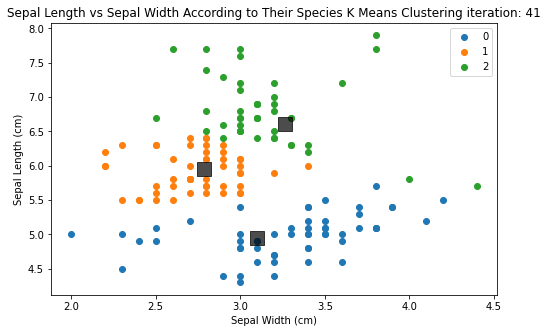

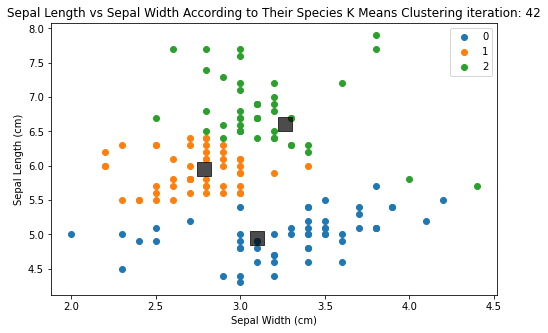

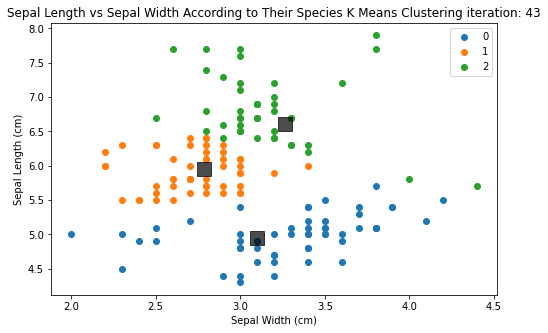

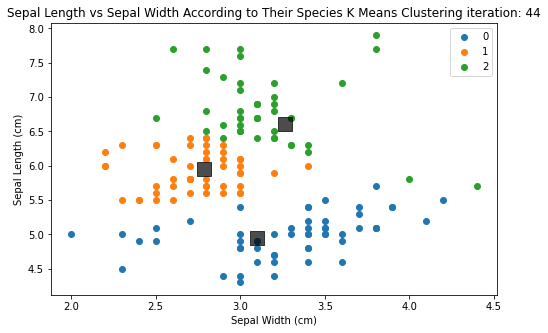

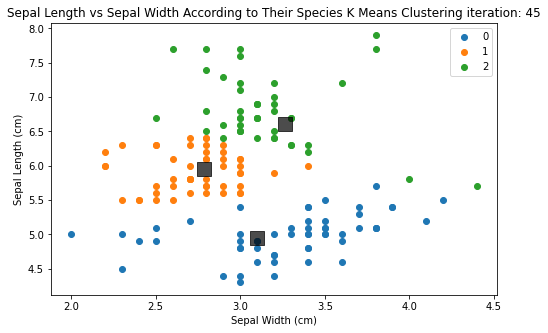

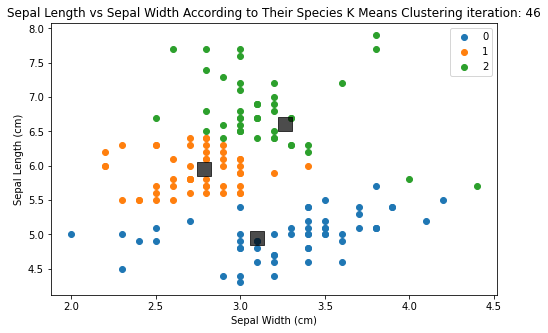

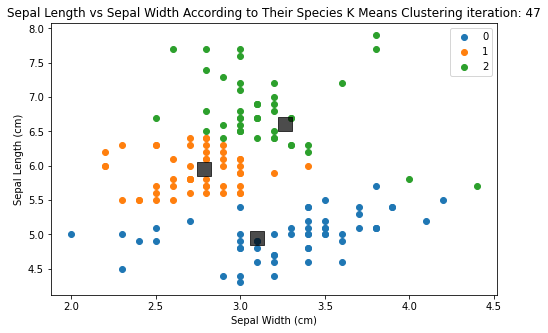

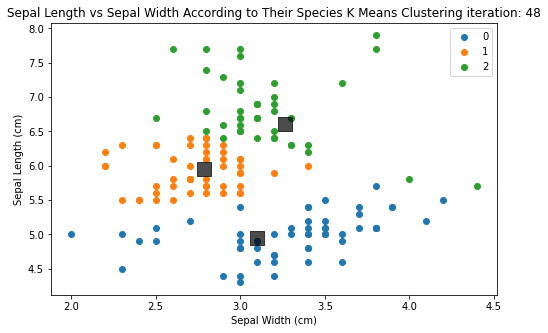

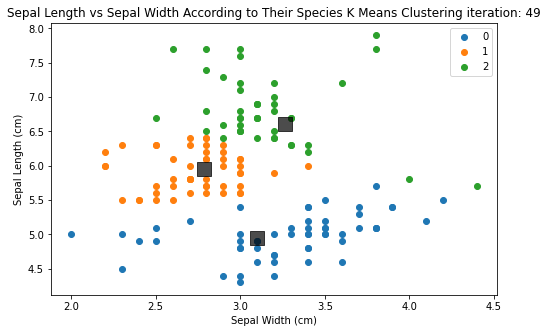

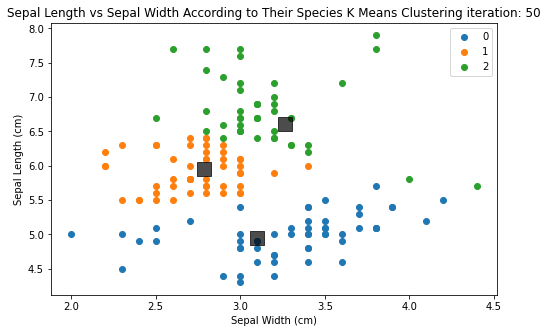

In [5]:
# Question 4
# This cell can take a while because it creates lots of plots.
label, centers = kmeans(df_for_k_means, 3, 50, True)
# We executed our K Means function with the iteration number 50 and k(cluster) number 3
# We wanted to see every step(iteration) so we use True boolean expression.
# If we set more iteration number it wil take too long but centers will not change much.
# For this reason we should determine to optimum iteration number.

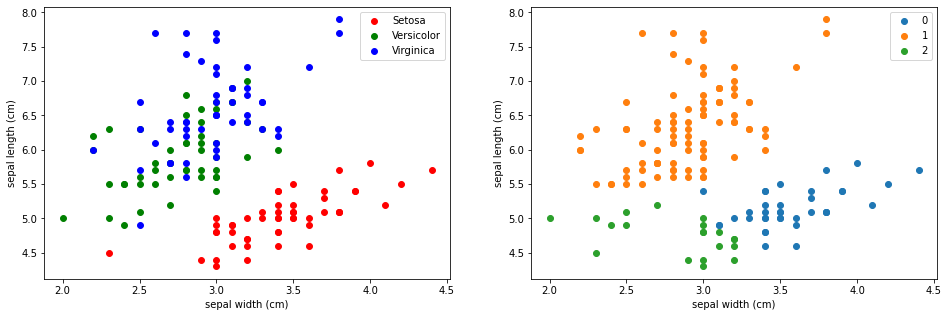

In [6]:
# Question 5
# We runned our K Means algortihm with False argument to not to show the iterations.
# We just stored the return variables to use them our side by side scatter plot.
# Returned values are the last iteration's variables.
label, centers = kmeans(df_for_k_means, 3, 50, False)
df_iris_Q5 = df_iris.copy()
# we copy to avoid permanent damage to the dataset and working with the copy.
plt.close() # We closed the figures to not make any weird looking.
# We used axes_1 and axes_2 to get side by side scatterplot.
# We used 16, 5 figsize because we always used 8, 5 fig size for one plot.
fig, (axes_1, axes_2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax = df_iris_Q5[df_iris_Q5.species==0].plot.scatter(x='sepal width (cm)', y='sepal length (cm)', 
                                                    color='red', label='Setosa',s = 35, ax = axes_1)
df_iris_Q5[df_iris_Q5.species==1].plot.scatter(x='sepal width (cm)', y='sepal length (cm)', 
                                                color='green', label='Versicolor',s = 35, ax=axes_1)
df_iris_Q5[df_iris_Q5.species==2].plot.scatter(x='sepal width (cm)', y='sepal length (cm)', 
                                                color='blue', label='Virginica',s = 35, ax=axes_1)

unique_labels_count = np.unique(label)
# We again used unique label's count to work with different number of clusters.
for i in unique_labels_count:
  plt.scatter(df_for_k_means[label == i , 0] , df_for_k_means[label == i , 1] , label = i)
  # We accessed with iteration variable i.
plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")
plt.legend()
# We set some variables just like label and legend to look pretty.
plt.show()
# Question 5 Discussion: In original labeled scatterplot we can see that some of the species are nearly mixed. 
# It is really normal because we
# cannot expect all the same kind of flowers to be the same size, the same length, the same color and the same scent.
# This also applies to us
# humans. If the average height of people in a country is 1.70 meters, 
# there are also very short and very tall people in this country.
# It is impossible to find these different data with an algorithm like K means. 
# Because the working logic of this algorithm is to calculate the
# selected cluster centers repeatedly throughout the iterations and bring them to the most appropriate position. 
# For this reason, unfortunately, we could not distinguish the different data. Because we only choose the 
# optimum of the distances to the cluster centers. For this reason, we
# cannot distinguish outliers data.
# We can also notice that the colors of the output produced with K Means change every time we run this cell. 
# This is because the K Means
# algorithm is an unsupervised learning algorithm, so it cannot know what the data means and its labels. 
# There is no need for it.

**Question 5 Discussion:** In original labeled scatterplot we can see that some of the species are nearly mixed. It is really normal because we cannot expect all the same kind of flowers to be the same size, the same length, the same color and the same scent. This also applies to us humans. If the average height of people in a country is 1.70 meters, there are also very short and very tall people in this country.<br>
It is impossible to find these different data with an algorithm like K means. Because the working logic of this algorithm is to calculate the selected cluster centers repeatedly throughout the iterations and bring them to the most appropriate position. For this reason, unfortunately, we could not distinguish the different data. Because we only choose the optimum of the distances to the cluster centers. For this reason, we cannot distinguish outliers data.<br>
We can also notice that the colors of the output produced with K Means change every time we run this cell. This is because the K Means algorithm is an unsupervised learning algorithm, so it cannot know what the data means and its labels. There is no need for it.